In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
import numpy as np

In [2]:
data=pd.read_csv('baseball.csv')

In [3]:
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
data.shape

(30, 17)

In [5]:
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


### Here in BaseBall dataset there is no missing value and no categorical data

- W - Wins
- R - Runs scored
- AB - At bats
- H - Hits by batters
- 2B - hits on which the batter reaches second base safely without the contribution of a fielding error
- 3B - hits on which the batter reaches third base safely without the contribution of a fielding error
- HR - Homeruns by batters
- BB - Walks by batters
- SO - Strikeouts by batters
- SB - Stolen bases
- RA - Run Average
- ER - Earned runs allowed
- ERA - Earned run average
- CG - Complete games
- SHO - Shutouts
- SV - Saves
- E - Errors

## Data Visulization

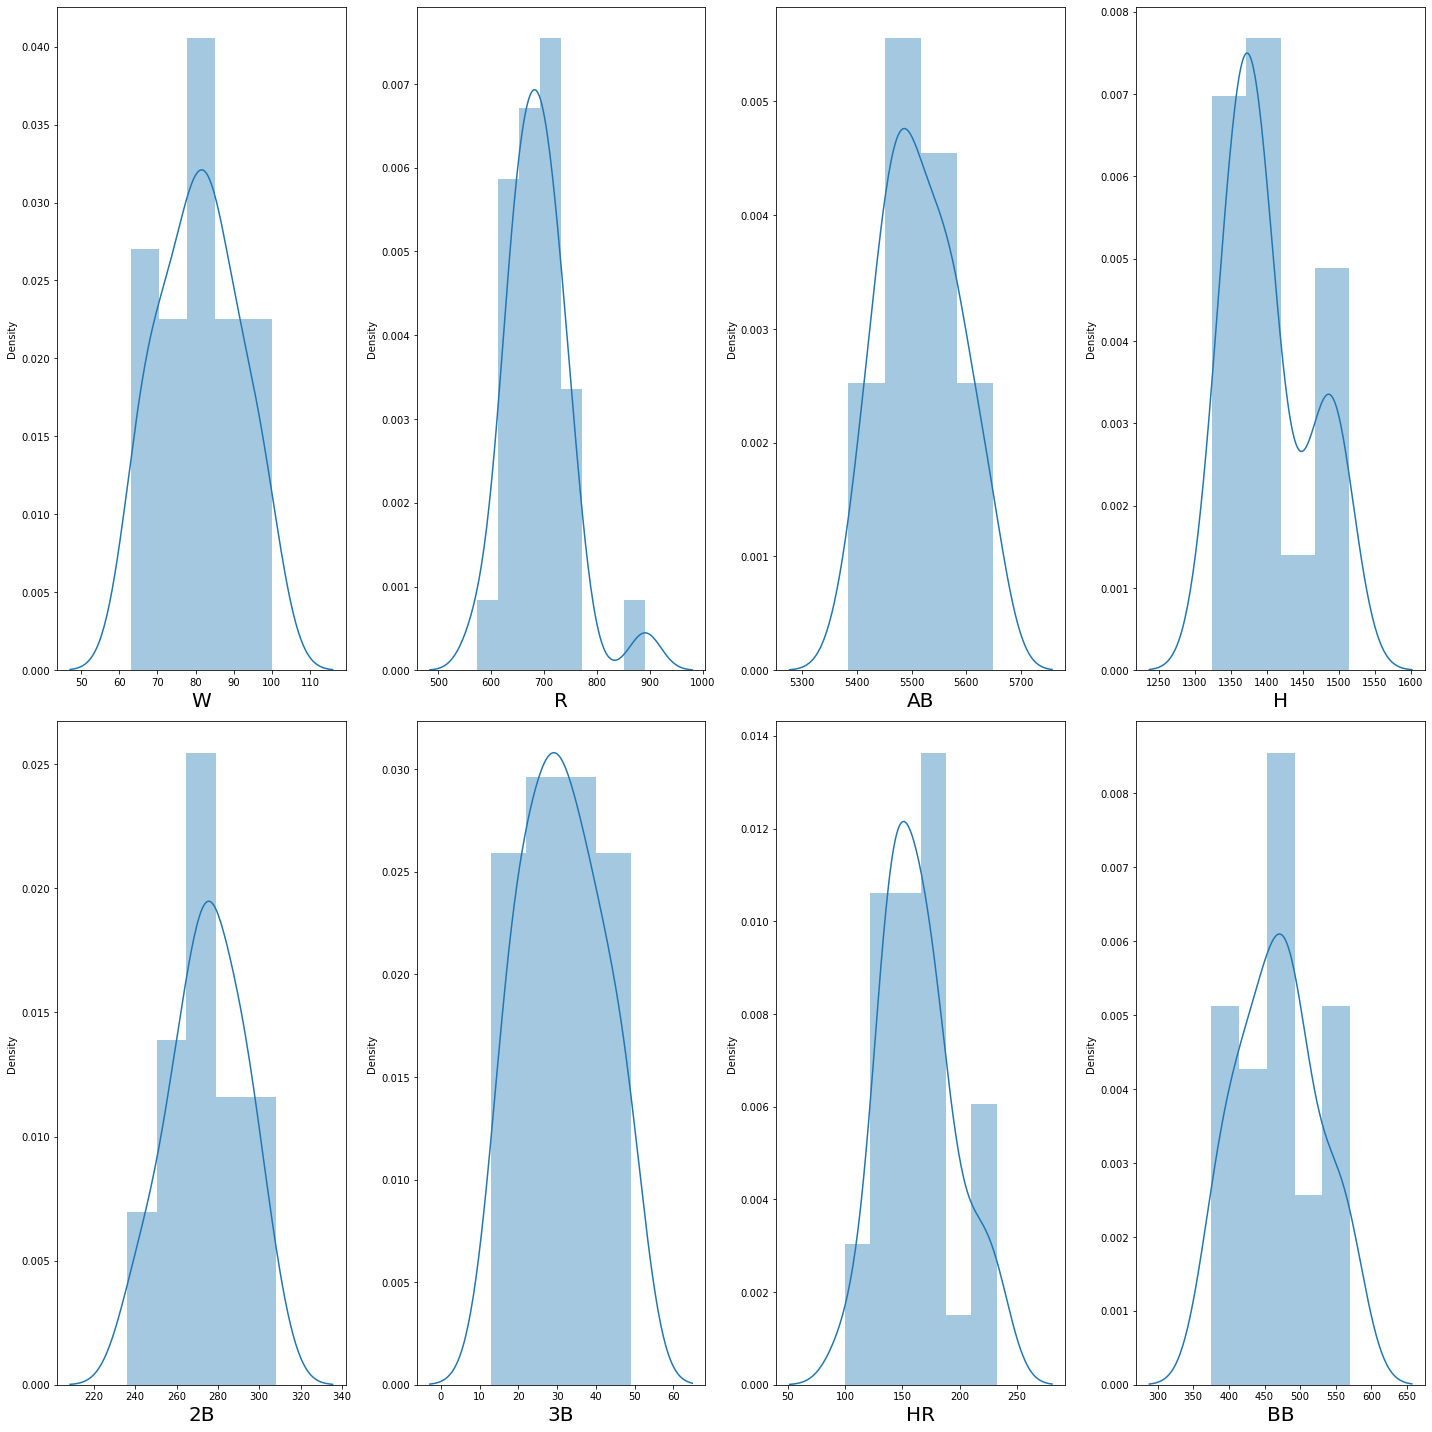

In [7]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

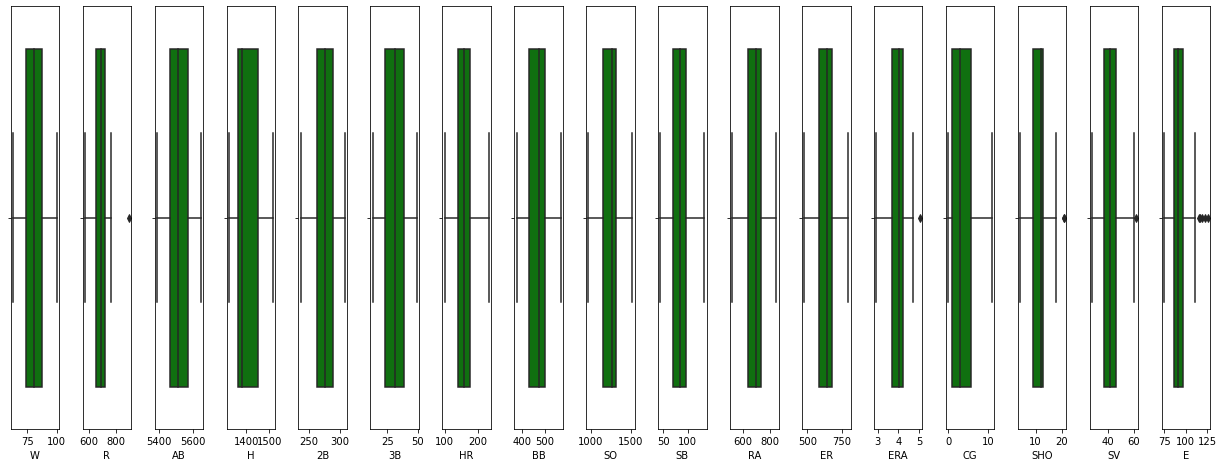

In [8]:
collist=data.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data[collist[i]],color='green',orient='v')
    plt.tight_layout()

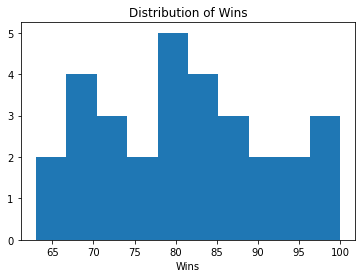

In [9]:
plt.hist(data['W'])
plt.xlabel('Wins')
plt.title('Distribution of Wins')
plt.show()

In [10]:
data.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

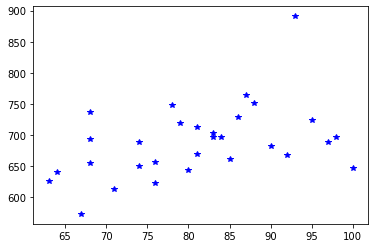

In [11]:
plt.plot(data['W'],data['R'],'b*')

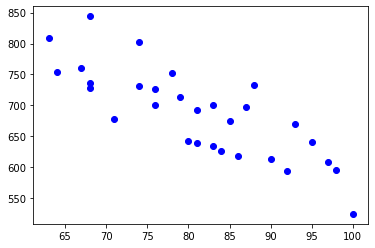

In [12]:
plt.plot(data['W'],data['RA'],'bo')

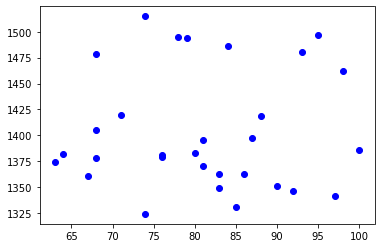

In [13]:
plt.plot(data['W'],data['H'],'bo')

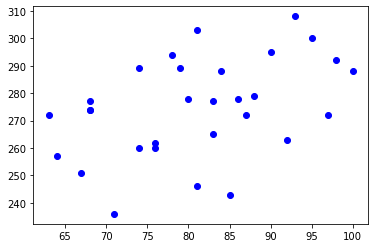

In [14]:
plt.plot(data['W'],data['2B'],'bo')

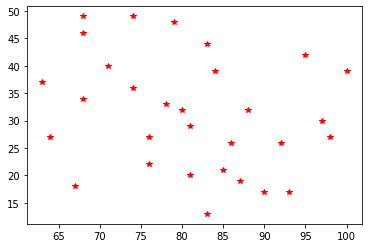

In [15]:
plt.plot(data['W'],data['3B'],'r*')

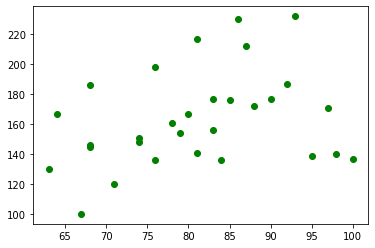

In [16]:
plt.plot(data['W'],data['HR'],'go')

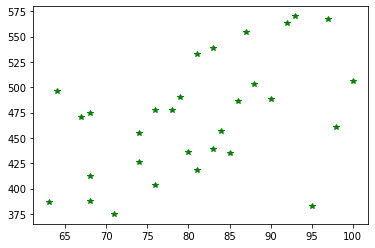

In [17]:
plt.plot(data['W'],data['BB'],'g*')

In [18]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


<AxesSubplot:xlabel='R', ylabel='W'>

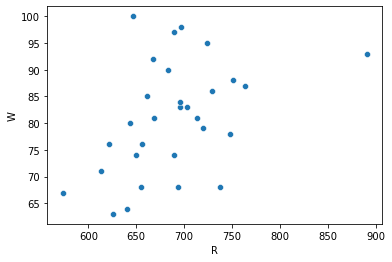

In [19]:
sns.scatterplot(x='R',y='W',data=data)

<AxesSubplot:xlabel='AB', ylabel='W'>

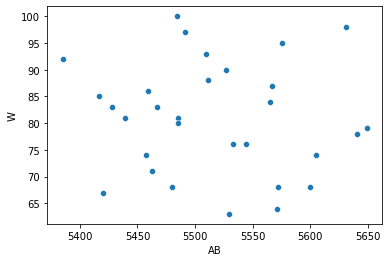

In [20]:
sns.scatterplot(x='AB',y='W',data=data)

<AxesSubplot:xlabel='H', ylabel='W'>

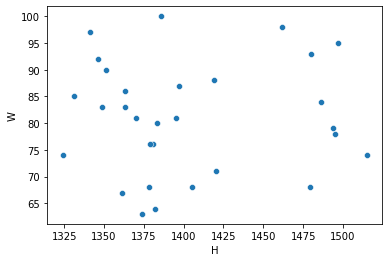

In [21]:
sns.scatterplot(x='H',y='W',data=data)

<AxesSubplot:xlabel='2B', ylabel='W'>

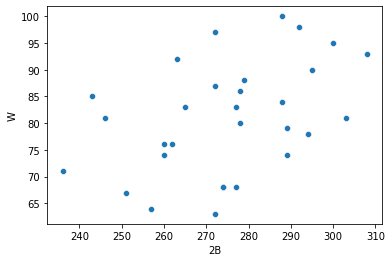

In [22]:
sns.scatterplot(x='2B',y='W',data=data)

<AxesSubplot:xlabel='3B', ylabel='W'>

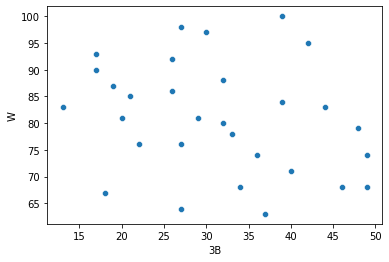

In [23]:
sns.scatterplot(x='3B',y='W',data=data)

<AxesSubplot:xlabel='HR', ylabel='W'>

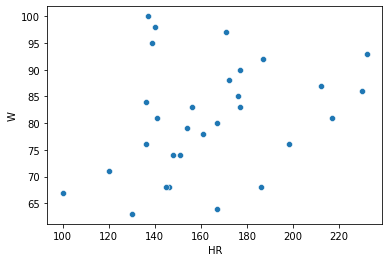

In [24]:
sns.scatterplot(x='HR',y='W',data=data)

<AxesSubplot:xlabel='BB', ylabel='W'>

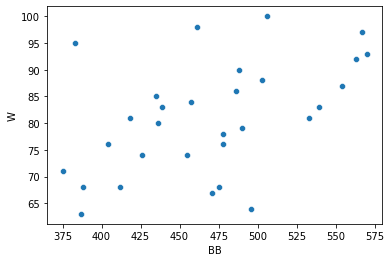

In [25]:
sns.scatterplot(x='BB',y='W',data=data)

<AxesSubplot:xlabel='SO', ylabel='W'>

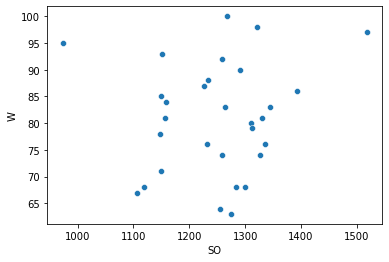

In [26]:
sns.scatterplot(x='SO',y='W',data=data)

<AxesSubplot:xlabel='SB', ylabel='W'>

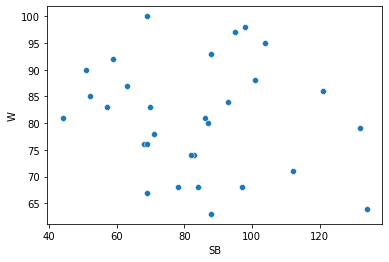

In [27]:
sns.scatterplot(x='SB',y='W',data=data)

<AxesSubplot:xlabel='RA', ylabel='W'>

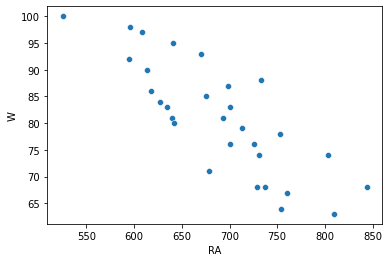

In [28]:
sns.scatterplot(x='RA',y='W',data=data)

<AxesSubplot:xlabel='ERA', ylabel='W'>

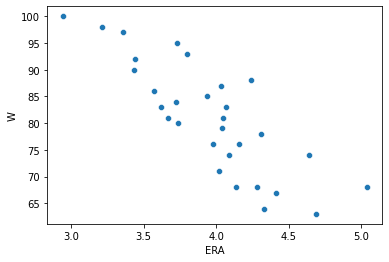

In [29]:
sns.scatterplot(x='ERA',y='W',data=data)

<AxesSubplot:xlabel='ER', ylabel='W'>

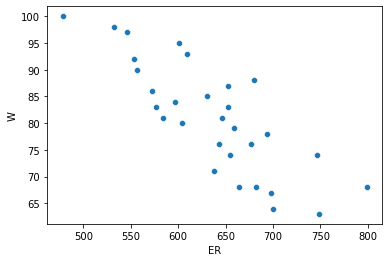

In [30]:
sns.scatterplot(x='ER',y='W',data=data)

<AxesSubplot:xlabel='R', ylabel='SHO'>

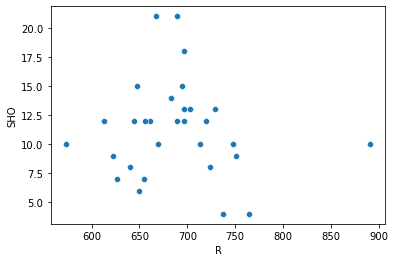

In [31]:
sns.scatterplot(x='R',y='SHO',data=data)

<AxesSubplot:xlabel='CG', ylabel='W'>

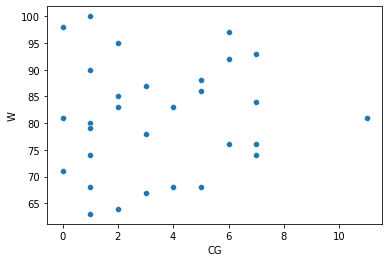

In [32]:
sns.scatterplot(x='CG',y='W',data=data)

<AxesSubplot:xlabel='SV', ylabel='W'>

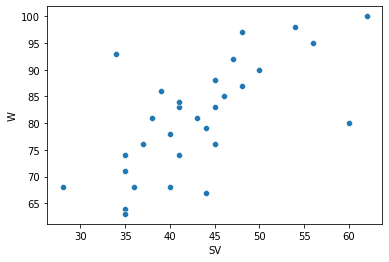

In [33]:
sns.scatterplot(x='SV',y='W',data=data)

<AxesSubplot:xlabel='E', ylabel='W'>

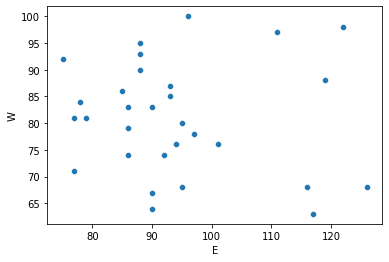

In [34]:
sns.scatterplot(x='E',y='W',data=data)

In [35]:
data.corr

<bound method DataFrame.corr of       W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
0    95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2   
1    83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   
2    81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   
3    76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7   
4    74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   
5    93  891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   
6    87  764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3   
7    81  713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   
8    80  644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   
9    78  748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   
10   88  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5   
11   86  729  5459  1363  278  2

<AxesSubplot:>

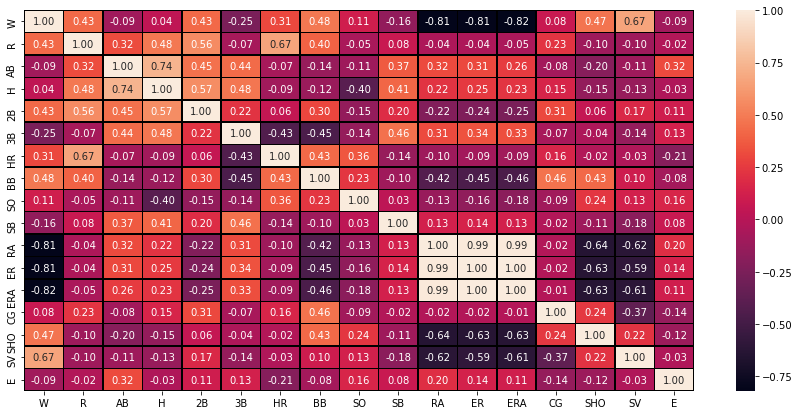

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,linecolor="black",fmt='.2f')

In [37]:
data.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [38]:
X=data.drop(columns='W',axis=1)
y=data['W']

In [39]:
X

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [40]:
y

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [41]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(X)
x

array([[ 0.61907797,  0.84773126,  1.66368512,  1.42017307,  1.04119304,
        -0.7872986 , -1.53490242, -2.69762957,  0.91388329, -0.66623393,
        -0.50511008, -0.50695519, -0.5398062 , -0.81462859,  1.67160651,
        -0.46146963],
       [ 0.13443166, -0.71109353, -0.97068076,  0.12740339,  1.23580856,
        -0.24396668, -0.5365919 ,  0.15487844, -0.60182558,  0.16597077,
         0.24892985,  0.25459752, -0.5398062 ,  0.1728    ,  0.24987932,
        -0.60719689],
       [-0.33290586, -1.1152333 , -0.15189137,  1.58879521, -0.22380785,
        -0.7233772 ,  1.13914361, -0.89398189,  0.11144918, -0.68033909,
        -0.75162313, -0.64134684,  2.77264091, -0.32091429, -0.65485616,
        -1.11724227],
       [-1.14641931,  0.24152162, -0.40108814, -0.82812203, -0.41842337,
        -0.8831807 , -1.16053598, -0.16860185, -0.69098493,  0.18007593,
         0.10392217,  0.05301004,  1.3004422 , -0.56777144, -0.78410408,
         0.48575751],
       [ 0.01327008,  1.28073815,  1

## We see that outcome  data is continous so we have use linear regressor methods and apply clustering method also

In [42]:
# Import necessary modules from `sklearn` 
from sklearn.cluster import KMeans
from sklearn import metrics

# Create silhouette score dictionary
s_score_dict = {}
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=1)
    l = km.fit_predict(X)
    s_s = metrics.silhouette_score(X, l)
    s_score_dict[i] = [s_s]

# Print out `s_score_dict`
print(s_score_dict)

{2: [0.18748860433845443], 3: [0.19358316219334482], 4: [0.20541223414847937], 5: [0.1503939479765748], 6: [0.16921655482606118], 7: [0.179008891085763], 8: [0.19225650677734948], 9: [0.1863303779313355], 10: [0.16293043962945603]}


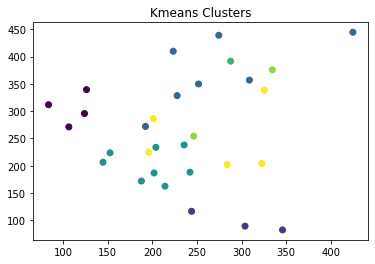

In [43]:
kmeans_model = KMeans(n_clusters=7, random_state=1)
distances = kmeans_model.fit_transform(X)

# Create scatter plot using labels from K-means model as color
labels = kmeans_model.labels_

plt.scatter(distances[:,0], distances[:,1], c=labels)
plt.title('Kmeans Clusters')

plt.show()

In [44]:
# Import `LinearRegression` from `sklearn.linear_model`
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Import `mean_absolute_error` from `sklearn.metrics`
from sklearn.metrics import mean_absolute_error

# Create Linear Regression model, fit model, and make predictions
lr = LinearRegression(normalize=True)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=105)
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)

# Determine mean absolute error
mae = mean_absolute_error(y_test, predictions)

# Print `mae`
print(mae)

3.5466663575812003


In [45]:
"""
print(f"At random state,the training accuracy is:-{r2_score(y_train,pred_train)*100}")
print(f"At random state,the testing accuracy is:-{r2_score(y_test,prediction)*100}")"""

'\nprint(f"At random state,the training accuracy is:-{r2_score(y_train,pred_train)*100}")\nprint(f"At random state,the testing accuracy is:-{r2_score(y_test,prediction)*100}")'

In [46]:
# Import `RidgeCV` from `sklearn.linear_model`
from sklearn.linear_model import RidgeCV

# Create Ridge Linear Regression model, fit model, and make predictions
rrm = RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0), normalize=True)
rrm.fit(x_train, y_train)
predictions_rrm = rrm.predict(x_test)

# Determine mean absolute error
mae_rrm = mean_absolute_error(y_test, predictions_rrm)
print(mae_rrm)

4.557055623872142


In [47]:
for i in range(0,100):
    feature_train,feature_test,target_train,target_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(feature_train,target_train)
    pred_train=lr.predict(feature_train)
    pred_test=lr.predict(feature_test)
    print(f"At random state {i},the training accuracy is:-{r2_score(target_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:-{r2_score(target_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:-0.9609590618835543
At random state 0,the testing accuracy is:-0.6629341689506518


At random state 1,the training accuracy is:-0.9715846357165404
At random state 1,the testing accuracy is:-0.3841724690075715


At random state 2,the training accuracy is:-0.9898192153844542
At random state 2,the testing accuracy is:--2.0819989550104157


At random state 3,the training accuracy is:-0.9722553885185529
At random state 3,the testing accuracy is:-0.46183789706024925


At random state 4,the training accuracy is:-0.9647461497996579
At random state 4,the testing accuracy is:-0.466068529272773


At random state 5,the training accuracy is:-0.9503092887369992
At random state 5,the testing accuracy is:-0.7517105066858143


At random state 6,the training accuracy is:-0.9489470045214469
At random state 6,the testing accuracy is:-0.8376419521868446


At random state 7,the training accuracy is:-0.9631978535911322
At random state 7,the testing accuracy is:--0.2

At random state 75,the training accuracy is:-0.9619107292032067
At random state 75,the testing accuracy is:-0.3197089913026767


At random state 76,the training accuracy is:-0.9823020250956476
At random state 76,the testing accuracy is:--0.5350831359882855


At random state 77,the training accuracy is:-0.9852345925877509
At random state 77,the testing accuracy is:--0.3919915994034102


At random state 78,the training accuracy is:-0.9617795239455275
At random state 78,the testing accuracy is:-0.39264201587647174


At random state 79,the training accuracy is:-0.9746721228360481
At random state 79,the testing accuracy is:-0.25891280632902725


At random state 80,the training accuracy is:-0.9815940714701809
At random state 80,the testing accuracy is:--1.3881438676976723


At random state 81,the training accuracy is:-0.9671418744471724
At random state 81,the testing accuracy is:--3.8324951921838055


At random state 82,the training accuracy is:-0.9792528357720716
At random state 82,the test

In [48]:
feature_train,feature_test,target_train,target_test=train_test_split(x,y,test_size=0.2,random_state=99)

In [49]:
lr.fit(feature_train,target_train)

LinearRegression(normalize=True)

In [50]:
pred_test=lr.predict(feature_test)

In [51]:
print(r2_score(target_test,pred_test))

0.8804448045510337


## Cross Validation score

In [52]:
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for traing is {Train_accuracy} and accuracy for test is {Test_accuracy}")
    print("\n")

At cross fold 2 the cv score is -1.2523494928864405 and accuracy score for traing is 0.9531948414942486 and accuracy for test is 0.8804448045510337


At cross fold 3 the cv score is 0.22588460167737323 and accuracy score for traing is 0.9531948414942486 and accuracy for test is 0.8804448045510337


At cross fold 4 the cv score is 0.24952166654368535 and accuracy score for traing is 0.9531948414942486 and accuracy for test is 0.8804448045510337


At cross fold 5 the cv score is 0.04075540667455626 and accuracy score for traing is 0.9531948414942486 and accuracy for test is 0.8804448045510337


At cross fold 6 the cv score is 0.251535309371869 and accuracy score for traing is 0.9531948414942486 and accuracy for test is 0.8804448045510337


At cross fold 7 the cv score is 0.3890804644289516 and accuracy score for traing is 0.9531948414942486 and accuracy for test is 0.8804448045510337


At cross fold 8 the cv score is 0.3193702210966707 and accuracy score for traing is 0.9531948414942486 

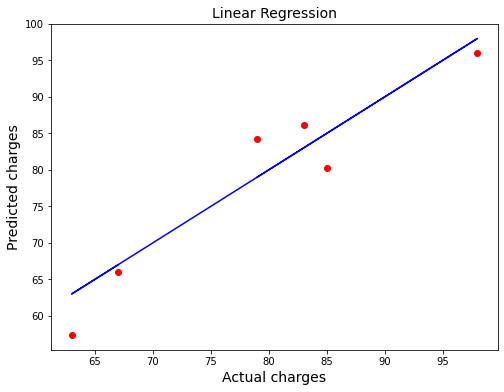

In [53]:
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test,color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=14)
plt.title('Linear Regression',fontsize=14)
plt.show()

# GridSearchCV

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [55]:
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,.1,1.10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(feature_train,target_train)

print(clf.best_params_)

{'alpha': 1.1, 'random_state': 0}


In [56]:
ls=Lasso(alpha=1.1,random_state=0)
ls.fit(feature_train,target_train)
ls.score(feature_train,target_train)
pred_ls=ls.predict(feature_test)

lss=r2_score(target_test,pred_ls)
lss

0.9173025131988598

In [57]:
cv_score=cross_val_score(ls,x,y,cv=8)
cv_mean=cv_score.mean()
cv_mean

0.6101978772497649

# Ensemble Technique

In [58]:
from sklearn.model_selection import GridSearchCV

parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(feature_train,target_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2'}


In [59]:
rf=RandomForestRegressor(criterion="mse",max_features="sqrt")
rf.fit(feature_train,target_train)
pred_decision=rf.predict(feature_test)

rfs=r2_score(target_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score: 71.14898093090017
Cross Val Score: -26.838013796834918


# Model Saving

In [60]:
import pickle
filename='baseball.pkl'
pickle.dump(ls,open(filename,'wb'))

# Conclusion

In [61]:
loaded_model=pickle.load(open('baseball.pkl','rb'))
result=loaded_model.score(feature_test,target_test)
print(result)

0.9173025131988598


In [62]:
conclusion=pd.DataFrame([loaded_model.predict(feature_test)[:],pred_decision[:]])

In [63]:
conclusion.T

,0,1
0,69.761319,74.77
1,65.612707,69.51
2,93.498400,88.26
3,80.743629,80.06
4,85.201720,86.53
5,82.088607,79.16
